## **Chapter 3 Prep: Skewness Correction**

---



## **Positive skewness**

Remember how Charges on insurance was highly skewed, while BMI was normally distributed and Age was uniformly distributed? Here's some ways to fix this issue.

In [37]:
import pandas as pd
import numpy as np

df = pd.read_csv('insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Skew**: Use the following code to see the skew for each variable. Notice that *bmi* and *age* are close to 0 (even though age is really uniformly distributed), but *charges* is well above 1. a

**Normal**: Skew MUST be between -1 and 1 in order to be considered *usable*

In [38]:
df.select_dtypes(np.number).skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

**Pairplot**: Look at the following pairplot to see each variable, how it's spread, and what happens when each variable is paired. **NOTICE**: There are major issues on each graph where *charges* is used, but BMI and age seem to be fairly nicely distributed. **NOTE**: Don't pay attention to *children* as a variable. 

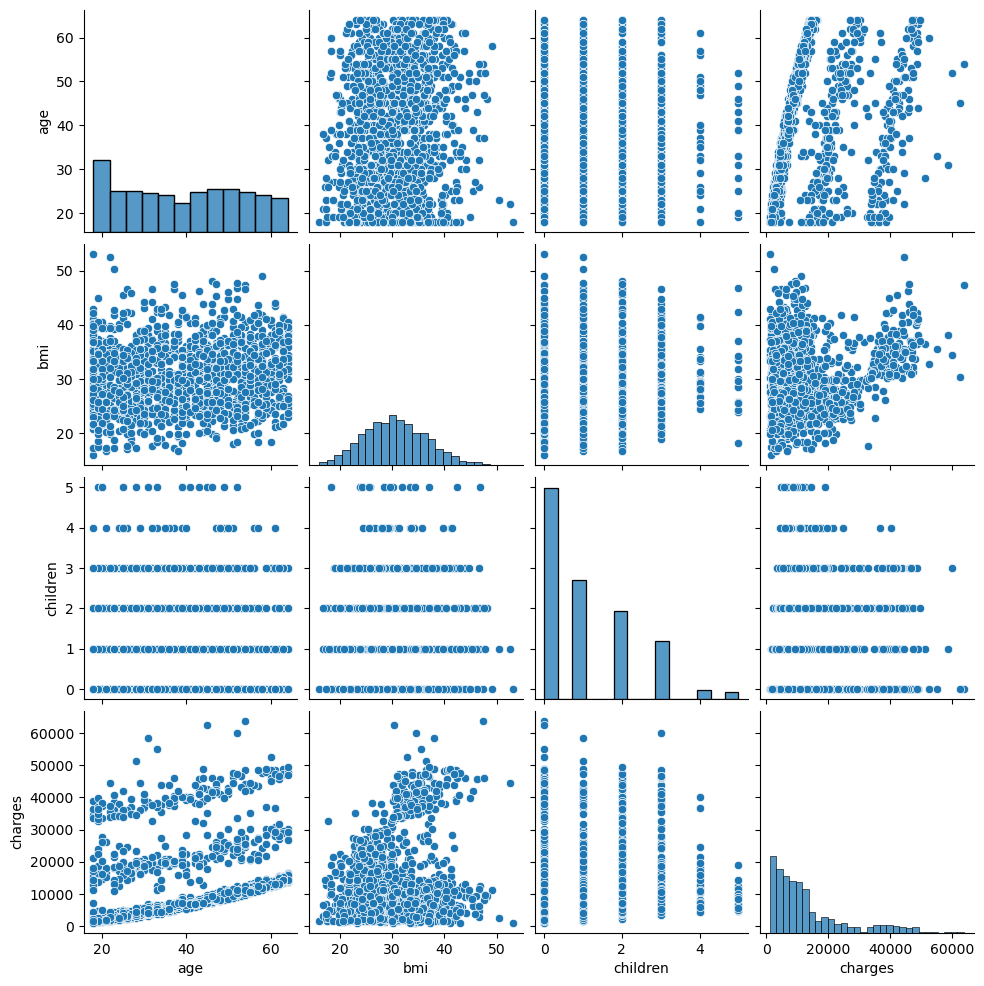

In [39]:
import seaborn as sns

sns.pairplot(df);

**Histogram and Scatterplot**: Notice the histograms on each side. BMI is normally distributed, but charges is skewed. THEN see how this affects the scatterplot between both. Look how the data appears in groups, so we can't trust the line to tell us anything about the data. These patterns in the data are caused by the skewness of *charges*.

**Now we can see why skewness is so bad for linear regression**

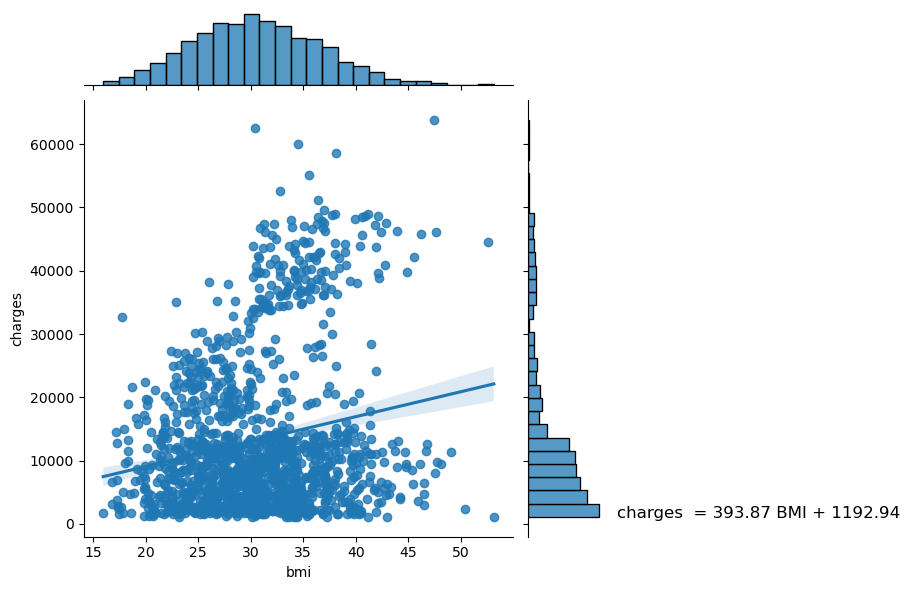

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

g = sns.JointGrid(x=df.bmi, y=df.charges)
g = g.plot(sns.regplot, sns.histplot)

# Calculate the regression line
m, b, r, p, err = stats.linregress(df.bmi, df.charges)

# Add the formula, r squared, and p-value to the figure
textstr  = 'charges  = ' + str(round(m, 2)) + ' BMI + ' + str(round(b, 2)) + '\n'

plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

plt.show()

**Transformations**: We can try three separate transformations for positively skewed data. The following code creates **three new columns**:
1. square root of charges (or charges^1/2)
2. cube root of charges (or charges^1/3)
3. natural log of charges (or ln(charges))

**New Model**: Originally, this model is **charges = 393.87 * BMI + 1192.94**, but we can't trust this model to actually predict charges on insurance based on BMI. Instead of using charges in our linear regression model, we can use one of the above columns with BMI instead--**BUT** this will be a slightly different equation.

In [41]:
df['chargesSR'] = np.sqrt(df['charges'])
df['chargesCR'] = np.cbrt(df['charges'])
df['chargesLN'] = np.log(df['charges'])
df.head()

,age,sex,bmi,children,smoker,region,charges,chargesSR,chargesCR,chargesLN
0,19,female,27.900,0,yes,southwest,16884.92400,129.942002,25.654666,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,41.539768,11.994331,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,66.704288,16.447599,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,148.271611,28.013799,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,62.184043,15.695891,8.260197


Look at the skew for each of the new columns. Notice how the *ln(charges)* is the closest to 0. Therefore, we can create a **new** model with ln(charges) and BMI. 

In [42]:
df.select_dtypes(np.number).skew()

age          0.055673
bmi          0.284047
children     0.938380
charges      1.515880
chargesSR    0.795863
chargesCR    0.515183
chargesLN   -0.090098
dtype: float64

Notice the slight changes in the following code. Instead of using *charges*, we use **chargesLN**.

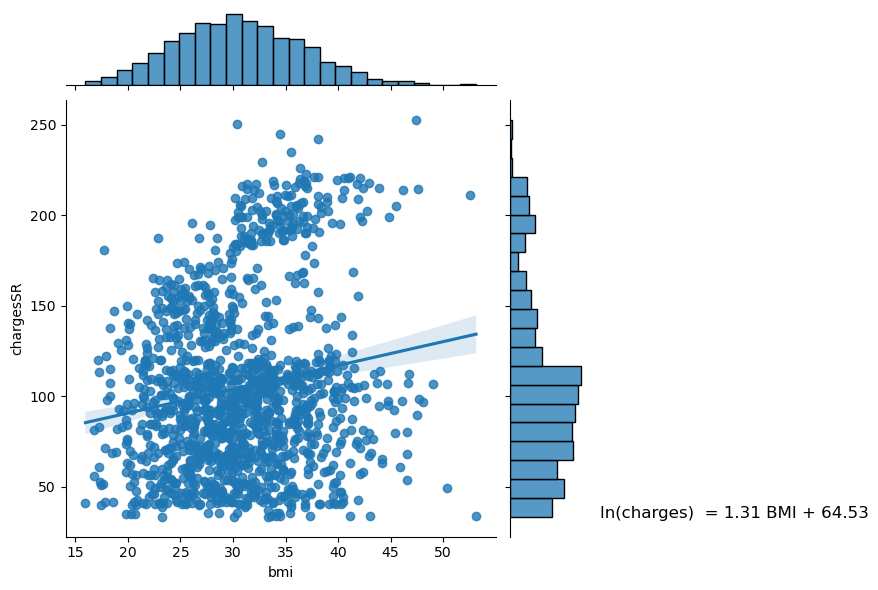

In [43]:
g = sns.JointGrid(x=df.bmi, y=df.chargesSR)
g = g.plot(sns.regplot, sns.histplot)

# Calculate the regression line
m, b, r, p, err = stats.linregress(df.bmi, df.chargesSR)

# Add the formula, r squared, and p-value to the figure
textstr  = 'ln(charges)  = ' + str(round(m, 2)) + ' BMI + ' + str(round(b, 2)) + '\n'

plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

In [44]:
1.31 * 23 + 64.53

94.66

In [45]:
94.66 * 94.66

8960.515599999999

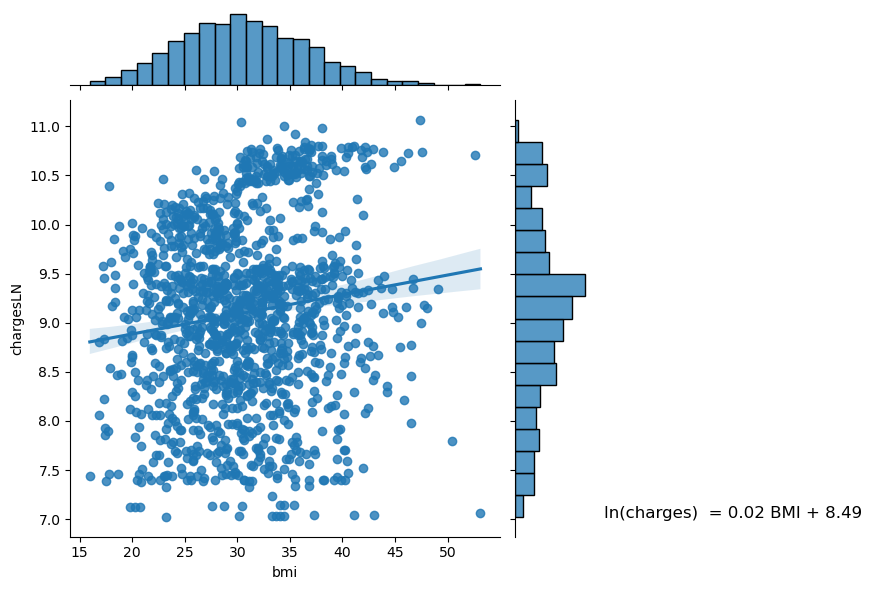

In [46]:
g = sns.JointGrid(x=df.bmi, y=df.chargesLN)
g = g.plot(sns.regplot, sns.histplot)

# Calculate the regression line
m, b, r, p, err = stats.linregress(df.bmi, df.chargesLN)

# Add the formula, r squared, and p-value to the figure
textstr  = 'ln(charges)  = ' + str(round(m, 2)) + ' BMI + ' + str(round(b, 2)) + '\n'

plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

**NEW MODEL**: Instead of predicting charges on insurance based on BMI, we now use the above code to predict the **natural log of charges** on insurance. So the new model is:

**ln(charges) = 0.02*BMI + 8.49**

*OR*

**charges = e^(0.02*BMI + 8.49)**, 
*ALSO written as* charges = exp(0.02*BMI + 8.49)

**REMINDER**: e^ln(x) = x, or e and ln() cancel each other out.

### Natural Log of Zero (0)

What if we have 0's in our data and we try to take the natural log? We can add 1 to every row with the following code.

In [47]:
np.log(0)

C:\Users\danli\AppData\Local\Temp\ipykernel_5796\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [48]:
np.log1p(0)

0.0

## **Negative Skewness**

Negative skewness works the *exact* same way, with one difference: instead of using square root and cube root transformations, we will be using **square** and **cube** transformations, or transforming our variable by bringing it to the power of 2 or 3 or some other amount.

In [49]:
import pandas as pd
df = pd.read_csv('imdb.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [50]:
df.drop(columns=['Title', 'Description', 'Actors', 'Director', 'Genre', 'Rank'], inplace=True)
print(df.skew())
df.head()

Year                 -0.689879
Runtime (Minutes)     0.846713
Rating               -0.743142
Votes                 2.507918
Revenue (Millions)    2.592516
Metascore            -0.123887
dtype: float64


,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,2014,121,8.1,757074,333.13,76.0
1,2012,124,7.0,485820,126.46,65.0
2,2016,117,7.3,157606,138.12,62.0
3,2016,108,7.2,60545,270.32,59.0
4,2016,123,6.2,393727,325.02,40.0


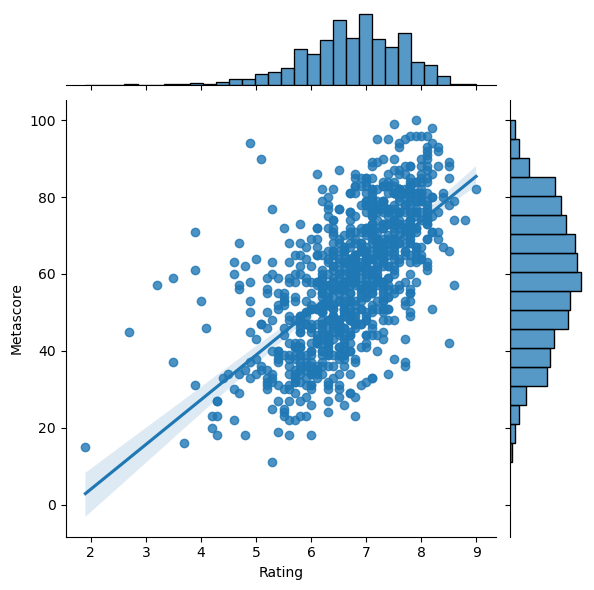

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.JointGrid(x=df.Rating, y=df.Metascore)
g = g.plot(sns.regplot, sns.histplot)

plt.show()

**Transformation**: Notice how the transformation is slightly different.

In [52]:
import numpy as np

df['Rating_2'] = df.Rating**2
df['Rating_3'] = df.Rating**3
df['Rating_e'] = np.exp(df.Rating)  #This is the same as e^Rating

df.skew()

Year                 -0.689879
Runtime (Minutes)     0.846713
Rating               -0.743142
Votes                 2.507918
Revenue (Millions)    2.592516
Metascore            -0.123887
Rating_2             -0.196074
Rating_3              0.192624
Rating_e              1.786629
dtype: float64

**Finding the best transformation**: In this case, *rating^2* and *rating^3* both give skews slightly around 0. So we want to take rating^*something*, or **something between 2 and 3**. We can use the following code to find the best transformation. **WARNING**: Be careful using this code, though. Make sure you think about what each step means.

There are other tests and programs out there that can find the best transformation for your data. One example is **Box Cox**, which a link is provided in Canvas.

The optimal exponential transformation is x**2.474 

Skewness 
Year                 -0.689879
Runtime (Minutes)     0.846713
Rating               -0.743142
Votes                 2.507918
Revenue (Millions)    2.592516
Metascore            -0.123887
Rating_2             -0.196074
Rating_3              0.192624
Rating_e              1.786629
Rating_2.474          0.000220
dtype: float64 



<Axes: xlabel='Rating_2.474', ylabel='Count'>

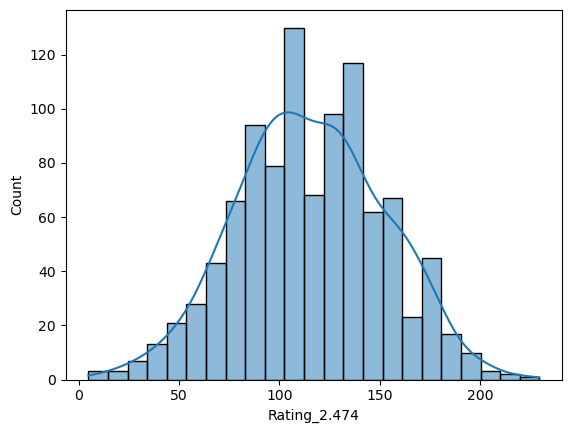

In [53]:
# Start with the transformation exponent
i = 2

# Make a copy of df['Rating'] to repeatedly transform until we find the best version
tuned_list = df['Rating'].copy()

# Continue transforming while the skewness of the list is negative
while tuned_list.skew() < 0:
    i += 0.001  # Increment the exponent
    tuned_list = df['Rating'] ** i  # Apply the transformation

# Print the optimal exponent and add the transformed feature to the DataFrame
print(f"The optimal exponential transformation is x**{round(i, 3)} \n")
df[f'Rating_{round(i, 4)}'] = df['Rating'] ** i

# Print skewness of all features in the DataFrame
print(f"Skewness \n{df.skew()} \n")

# Plot the distribution of the new transformed feature
sns.histplot(df[f'Rating_{round(i, 4)}'], kde=True)


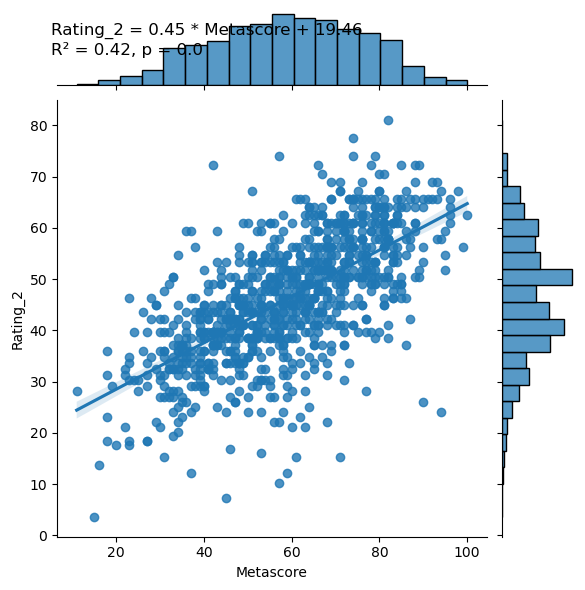

In [57]:
# Drop rows with NaN in the relevant columns
df_cleaned = df.dropna(subset=['Metascore', 'Rating_2'])

# Calculate the regression line
m, b, r, p, err = stats.linregress(df_cleaned.Metascore, df_cleaned.Rating_2)

# Create the JointGrid plot
g = sns.JointGrid(x=df_cleaned.Metascore, y=df_cleaned.Rating_2)
g = g.plot(sns.regplot, sns.histplot)

# Add the formula, R-squared, and p-value to the figure
textstr = f'Rating_2 = {round(m, 2)} * Metascore + {round(b, 2)}\n'
textstr += f'R² = {round(r**2, 2)}, p = {round(p, 3)}'

plt.text(0.1, 0.9, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()


This means that instead of using **Rating** in your equation model, **Rating^2.475** would be used to predict Metascore: **(Metascore = m * Rating^2.475 + b)**

## **Last Resort: Binning**

This is *not* a good method, but is an option if skew is still too high or low, despite any transformation attempted. You'll see this on your homework.

### Housing SalesPrice Data

In [ ]:
import pandas as pd
df = pd.read_csv('housing.csv', usecols=['SalePrice', 'MiscVal', 'PoolArea'])
print(df.shape)
print(df.skew())

FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

The following transformations of SalePrice get close to 0, but SalePrice could also be *binned* as a transformation

In [ ]:
import numpy as np

df['SalePrice_SR'] = df.SalePrice**(1/2)
df['SalePrice_CR'] = df.SalePrice**(1/3)
df['SalePrice_LN'] = np.log(df.SalePrice)

df.skew()

SalePrice        1.882876
PoolArea        14.828374
MiscVal         24.476794
SalePrice_SR     0.943153
SalePrice_CR     0.666768
SalePrice_LN     0.121335
dtype: float64

**Binning**: This will automatically group your rows into bins in order to make SalePrice "appear" normally distributed. This means that some bins may have lots of values, and some may have few.

In [ ]:
def bin_numeric(series):
  from scipy.stats import norm
  import numpy as np

  # Determine the appropriate number of bins:
  n_bins = int(2*len(list(series))**(2/5))

  # Determine the cutoffs/edges of each bin based on a normal distribution
  edges = np.linspace(-3, 3, n_bins) # Return n (n_bins) evenly spaced numbers from -3 to 3
  edges = norm.cdf(edges) # Returns the edge values of each bin that provide a normal distribution
  edges = list(np.quantile(series, edges)) # Creates a list of the original series converted to bins
  edges.append(max(series)) # Add the max value of the series to the end of the list

  # Update each actual value of MiscVal to the largest bin edge that it is less than
  new_series = []               # Create empty list to store new values
  for value in list(series):    # Loop through original list one-at-a-time
    for edge in edges:          # For each original list value, loop through a list of sorted-ascending edges
      if value <= edge:         # As soon as we find an edge value less than the original...
        new_series.append(edges.index(edge)) # ..., add the rank-order of the edge to the new list
        break                   # Break out of the loop since we found our edge

  # Return the number of bins and edge values in addition to the new data in case we want to examine them
  return [n_bins, edges, new_series]

In [ ]:
bin_results = bin_numeric(df.SalePrice)
print(f"Bins:\t{bin_results[0]}")
print(f"Edges:\t{bin_results[1]}")
df['SalePrice_BIN'] = bin_results[2]

# Re-ordering just for the ease of reading the skewness results
df = df[['SalePrice', 'SalePrice_SR', 'SalePrice_CR', 'SalePrice_LN', 'SalePrice_BIN', 'MiscVal', 'PoolArea']]
df.head(5)

Bins:	36
Edges:	[37821.03867967596, 39587.60871772163, 52374.45033575395, 57075.6005677101, 62522.03195118744, 73869.74939197103, 80000.0, 84211.16779287937, 89203.96897706142, 97416.81761750599, 106209.241998605, 112000.0, 119000.0, 127000.0, 133000.0, 139923.87679698173, 147000.0, 157000.0, 169164.7792545201, 179521.54133460083, 190000.0, 205821.46614251053, 224344.78820393156, 239773.28939870658, 260000.0, 278244.5480083702, 307332.729529976, 325170.08345410106, 356946.0885126308, 385000.0, 411412.8132600365, 439919.8776662973, 480681.68899995956, 555396.9880383459, 599855.1817030904, 628659.8526221951, 755000]


,SalePrice,SalePrice_SR,SalePrice_CR,SalePrice_LN,SalePrice_BIN,MiscVal,PoolArea
0,34900,186.815417,32.679480,10.460242,0,0,0
1,35311,187.912214,32.807263,10.471950,0,0,0
2,37900,194.679223,33.590237,10.542706,1,0,0
3,39300,198.242276,33.998847,10.578980,1,0,0
4,40000,200.000000,34.199519,10.596635,2,0,0


Notice that some bins are given "0", some are given "1", and some are given "2", all the way up to "35." If we were to make a model out of this, we would have to translate any SalePrice into its specific bin number, then plug-and-chug that **bin number** into the model.

SalePrice_BIN skew: 0.0015628868363255378
SalePrice_BIN kurt: -0.05075478768391184



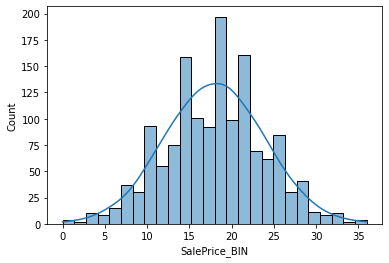

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(f'SalePrice_BIN skew: {df.SalePrice_BIN.skew()}')
print(f'SalePrice_BIN kurt: {df.SalePrice_BIN.kurt()}\n')
sns.histplot(df.SalePrice_BIN, kde=True)
plt.show()

# **Practice** 

---



## Practice 1: Loan data skewness

In [ ]:
# Don't forget to mount Google Drive if you haven't already:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/lc_small.csv')
df.select_dtypes(np.number).skew()

loan_status_numeric       -2.320589
loan_amnt                  0.799593
int_rate                   0.930093
installment                1.007838
total_pymnt                1.693445
total_rec_prncp            1.898846
total_rec_int              2.539680
total_rec_late_fee        12.106651
annual_inc                 5.845586
acc_now_delinq            24.010477
delinq_2yrs                6.552969
inq_last_6mths             1.751501
mths_since_last_delinq     0.460044
mths_since_last_record    -0.536699
open_acc                   1.461296
pub_rec                    4.595778
revol_bal                  9.690942
revol_util                 0.118710
tot_coll_amt              16.587656
tot_cur_bal                2.524677
total_acc                  1.008800
total_rev_hi_lim           5.961364
dti                       29.282342
dtype: float64

Practice #2: 

In [ ]:
import numpy as np

df['loan_status_numeric_SQ'] = df['loan_status_numeric']**2
df['loan_status_numeric_CB'] = df['loan_status_numeric']**3
df['loan_status_numeric_EXP'] = np.exp(df['loan_status_numeric'])

print(df[['loan_status_numeric', 'loan_status_numeric_SQ', 'loan_status_numeric_CB', 'loan_status_numeric_EXP']].skew())

df.drop(columns=['loan_status_numeric_EXP', 'loan_status_numeric_SQ'], inplace=True)

loan_status_numeric       -2.320589
loan_status_numeric_SQ    -1.381329
loan_status_numeric_CB    -0.528514
loan_status_numeric_EXP    0.623720
dtype: float64


Practice #3: 

In [ ]:
df['annual_inc_SQRT'] = df['annual_inc']**(1/2)
df['annual_inc_CBRT'] = df['annual_inc']**(1/3)
df['annual_inc_LN1P'] = np.log1p(df['annual_inc'])

print(df[['annual_inc', 'annual_inc_SQRT', 'annual_inc_CBRT', 'annual_inc_LN1P']].skew())

df.drop(columns=['annual_inc_LN1P', 'annual_inc_SQRT'], inplace=True)

annual_inc         5.845586
annual_inc_SQRT    1.658885
annual_inc_CBRT    0.892226
annual_inc_LN1P   -4.159577
dtype: float64


Practice #4:

acc_now_delinq         24.010477
acc_now_delinq_SQRT    19.039021
acc_now_delinq_CBRT    18.560252
acc_now_delinq_LN1P    19.748169
dtype: float64
loan_status_numeric       -2.320589
loan_amnt                  0.799593
int_rate                   0.930093
installment                1.007838
total_pymnt                1.693445
                            ...    
total_rev_hi_lim           5.961364
dti                       29.282342
loan_status_numeric_CB    -0.528514
annual_inc_CBRT            0.892226
acc_now_delinq_BIN        18.794650
Length: 26, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


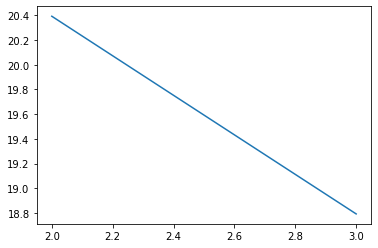

In [ ]:
df['acc_now_delinq_SQRT'] = df['acc_now_delinq']**(1/2)
df['acc_now_delinq_CBRT'] = df['acc_now_delinq']**(1/3)
df['acc_now_delinq_LN1P'] = np.log1p(df['acc_now_delinq'])

print(df[['acc_now_delinq', 'acc_now_delinq_SQRT', 'acc_now_delinq_CBRT', 'acc_now_delinq_LN1P']].skew())

df.drop(columns=['acc_now_delinq_SQRT', 'acc_now_delinq_CBRT', 'acc_now_delinq_LN1P'], inplace=True)

def bin_numeric(series, custom_bins=False): # this function will try every combination of bins between 2 and the sample size - 1
  from scipy.stats import norm
  import numpy as np
  import scipy.stats
  import seaborn as sns

  def bin(bins): 
    edges = np.linspace(-3, 3, bins)
    edges = norm.cdf(edges)
    edges = list(np.quantile(series, edges))
    edges.append(max(series))

    new_series = []
    for value in list(series): 
      for edge in edges:
        if value <= edge:
          new_series.append(edges.index(edge))
          break
    return new_series

  # Determine the appropriate number of bins:
  if custom_bins:
    bins = 2
    skews = []
    while bins < series.nunique():
      skews.append(scipy.stats.skew(bin(bins)))
      bins += 1
    sns.lineplot(x=range(2, series.nunique()), y=skews)
    return bin(skews.index(min(skews))+2)
  else:
    bins = int(2*len(list(series))**(3/5))
    return bin(bins)
      

pd.set_option('display.max_rows', 20)
df['acc_now_delinq_BIN'] = bin_numeric(df["acc_now_delinq"], True)
print(df.skew())

The answer to the question above is 3. Three bins returns the lowest skewness score